In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv("../data/ciqual_small.csv")

# 03 - Loss Function

If you recall the workflow above, the first step is the parameter initialization. Easy: we'll start with random values for $\theta_0$ and $\theta_1$. Step 2. was the forward propagation that we just coded. So, we can now start step 3: calculate the error of our model using the MSE.

An loss function is a function that we use to compare a prediction with the ground truth.

<img src="images/errors.png" width="400">

In linear regression, we generally use the *Mean Squared Error* (MSE). This corresponds to the average of the squared differences between predictions and ground truth. For each data sample, you can calculate the prediction, take the difference between the real value, square this difference. Then, take the mean of these results.


<details>
  <summary>Mathematical Notation - Only if you are not allergic </summary>
    
Let $\hat{y}$ be the predictions and $y$ the ground truth. The MSE loss function $L$ is defined with:

$$
L_{\theta_0, \theta_1} = \sum_{i=0}^n (\hat{y}^{(i)} - y^{(i)})^2
$$

with $i$ the index of the current data sample and $n$ the total number of samples.

</details>


For this first part, you will calculate the error for a single sample. This is simpler: you just need to calculate the difference between the prediction and the ground truth for this sample and square this difference.


<details>
  <summary>Mathematical Notation - Only if you are not allergic </summary>
Here is the equation corresponding to the loss for the single sample $i$:

$$
L_{\theta_0, \theta_1} = (\hat{y}^{(i)} - y^{(i)})^2
$$

</details>


Let's initialize our parameters randomly and use seed to be sure that our results are reproducible:

In [5]:
np.random.seed(123)
theta0 = np.random.rand()
theta1 = np.random.rand()
print(theta0, theta1)
# you should get: 0.6964691855978616 0.28613933495037946

0.6964691855978616 0.28613933495037946


Your exercise is to implement the MSE function and calculate the error for the first 3 samples:

In [6]:
data[:3]

,alim_ssgrp_nom_eng,alim_nom_eng,Phosphorus (mg/100g),Protein (g/100g),Zinc (mg/100g)
0,pasta. rice and grains,Durum wheat pre-cooked. whole grain. cooked. u...,116.0,5.25,0.48
1,pasta. rice and grains,Asian noodles. plain. cooked. unsalted,43.0,3.50,0.19
2,pasta. rice and grains,Rice. brown. cooked. unsalted,120.0,3.21,0.62


Remind that we want to predict the amount of phosphorus from the amount of zinc.

<details>
  <summary>hint</summary>
  You need to use your hypothesis function $h$ from above to calculate $\hat{y}$.
</details>


In [7]:
# Your code here


In [12]:
# Take h() from Exercise 02
def h(x, theta0, theta1):
    y_pred = theta0 + theta1 * x
    return y_pred

In [13]:
def L(x, y, theta0, theta1):
    y_hat = h(x, theta0, theta1)
    return (y_hat - y) ** 2

To check your function, here are few tests that you can run. They correspond to the first 3 samples of the Ciqual dataset:

In [14]:
L(x=0.48, y=116, theta0=theta0, theta1=theta1)
# should return 13263.249921833765

13263.249921833765

In [15]:
L(x=0.19, y=43, theta0=theta0, theta1=theta1)
# should return 1784.9918874926789

1784.9918874926789

In [16]:
L(x=0.62, y=120, theta0=theta0, theta1=theta1)
# should return 1784.9918874926789

14191.03352093345

These values correspond to the error of our model for each sample. It seems that the model is not very good, and this is normal, since it is just random for now 😀.

Now, you can try to plot the random regression line along with the data to have an idea of the loss.

In [17]:
# Your code here


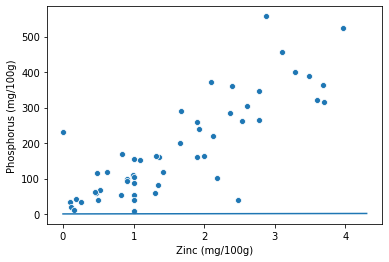

In [18]:
x_line = np.arange(data['Zinc (mg/100g)'].min() - data['Zinc (mg/100g)'].min() / 10,
                   data['Zinc (mg/100g)'].max() + data['Zinc (mg/100g)'].max() / 10,
                  0.1)
y_line = theta0 + theta1 * x_line

sns.scatterplot('Zinc (mg/100g)','Phosphorus (mg/100g)', data=data)
plt.plot(x_line, y_line)

**How to plot linear equations?**

To plot the regression line, we create a variable `x_line` with values with the range we need (according to the samples):


In [19]:
x_line

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3])

And we apply the linear function with our parameters to this array with `y_line = theta0 + theta1 * x_line
`.

In [20]:
y_line

array([0.69646919, 0.72508312, 0.75369705, 0.78231099, 0.81092492,
       0.83953885, 0.86815279, 0.89676672, 0.92538065, 0.95399459,
       0.98260852, 1.01122245, 1.03983639, 1.06845032, 1.09706425,
       1.12567819, 1.15429212, 1.18290606, 1.21151999, 1.24013392,
       1.26874786, 1.29736179, 1.32597572, 1.35458966, 1.38320359,
       1.41181752, 1.44043146, 1.46904539, 1.49765932, 1.52627326,
       1.55488719, 1.58350112, 1.61211506, 1.64072899, 1.66934292,
       1.69795686, 1.72657079, 1.75518472, 1.78379866, 1.81241259,
       1.84102653, 1.86964046, 1.89825439, 1.92686833])

We can then plot the pairs of values `x_line` and `y_line`.

In comparison to the scale of the variable `phosphorus`, the value of $\theta_0$ and $\theta_1$ are very small and the regression line is almost an horizontal line when plotted along the data samples.

We can also represent only the sample we used to calculate the loss 

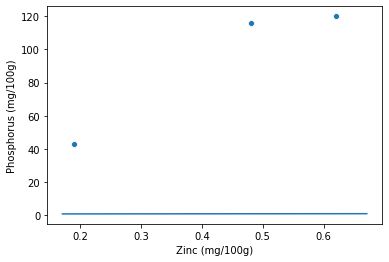

In [21]:
x_line = np.arange(data[:3]['Zinc (mg/100g)'].min() - data[:3]['Zinc (mg/100g)'].min() / 10,
                   data[:3]['Zinc (mg/100g)'].max() + data[:3]['Zinc (mg/100g)'].max() / 10,
                  0.1)
y_line = theta0 + theta1 * x_line

sns.scatterplot('Zinc (mg/100g)','Phosphorus (mg/100g)', data=data[:3])
plt.plot(x_line, y_line)